# Readme

**Abstract**
Customer churn prediction for a telecom company. Customers who left within the last month is called Churn. For each customer, there is information about how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, total charges, and others. Given that information, this project aims to answer if it is possibile to predict whether a customer will stop doing business with the company. To answer it, an artificial neural network was utilized with 80% accuracy on the respective test data. So yes, it is possible to predict customer churn from the given data.

**Data and Methods**
*Data*:
This project uses data from Telco Customer Churn downloaded from https://www.kaggle.com/datasets/blastchar/telco-customer-churn.
The data set includes information about:
Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

*Methods*:
Correlation matrix, heatmap, univariate selection, deep learning (tensorflow), histogram, confusion matrix, stratified hold out split

**Results**:
An artificial neural network was utilized with 80% accuracy on the respective test data. So yes, it is possible to predict customer churn from the given data.

# Customer churn prediction

# Prepare and explore data

## Import modules

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

## Import data and explore it

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Explore TotalCharges

In [4]:
# Count instances when Total Charges is missed.
df = df[ df['TotalCharges'] != ' ']
df.shape

(7032, 21)

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

C:\Users\user\AppData\Local\Temp\ipykernel_9320\964642758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])


In [6]:
df['TotalCharges'].dtypes

dtype('float64')

In [7]:
df.shape

(7032, 21)

Text(0, 0.5, 'Number of people')

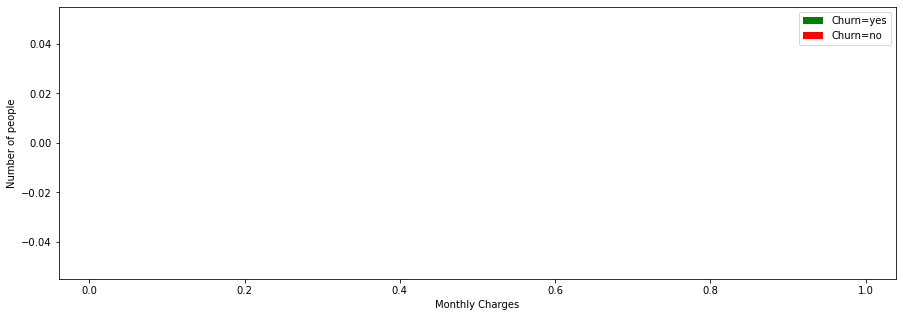

In [41]:
MC_churn_no = df[df['Churn'] == 'No'].MonthlyCharges
MC_churn_yes = df[df['Churn'] == 'Yes'].MonthlyCharges

plt.figure(figsize=[15,5])
plt.hist(
        [MC_churn_yes, MC_churn_no],
         color=['green', 'red'],
         bins=10,
         label=['Churn=yes', 'Churn=no']
        )                                                                          
plt.legend()
plt.xlabel('Monthly Charges')
plt.ylabel('Number of people')

### Explore Tenure

In [9]:
# check whether Churn might have unexpected values
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

Text(0, 0.5, 'Number of people')

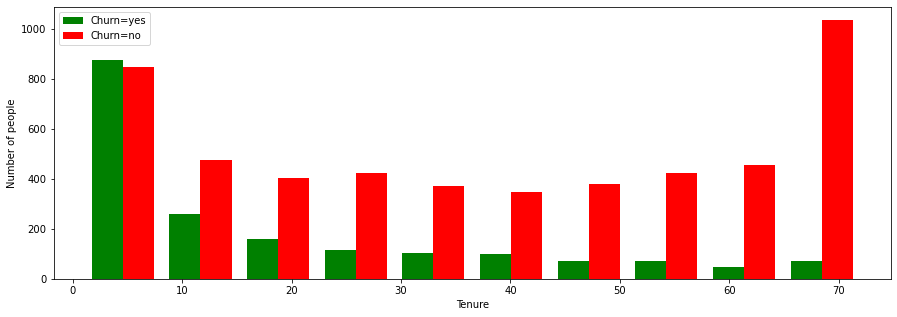

In [10]:
tenure_churn_no = df[df['Churn'] == 'No'].tenure
tenure_churn_yes = df[df['Churn'] == 'Yes'].tenure

plt.figure(figsize=[15,5])
plt.hist(
        [tenure_churn_yes, tenure_churn_no],
         color=['green', 'red'],
         bins=10,
         label=['Churn=yes', 'Churn=no']
        )                                                                          
plt.legend()
plt.xlabel('Tenure')
plt.ylabel('Number of people')

### Explore columns and their unique values

In [11]:
def columns_and_unique_values(df):
    for column in df:
        if df[column].dtypes == 'object': #skip 'numerical' columns
            print(column, ':', df[column].unique())

In [12]:
columns_and_unique_values(df)

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


#### I will replace values of 'No internet service' with No. The same for 'No phone service'.

In [13]:
df.replace(to_replace='No internet service', value='No', inplace=True)
df.replace(to_replace='No phone service', value='No', inplace=True)
columns_and_unique_values(df)

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


C:\Users\user\AppData\Local\Temp\ipykernel_9320\731593711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(to_replace='No internet service', value='No', inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_9320\731593711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(to_replace='No phone service', value='No', inplace=True)


#### Replace unique values with 1 for Yes and 0 for No

In [14]:
# replace Yes and No
df.replace(to_replace='Yes', value=1, inplace=True)
df.replace(to_replace='No', value=0, inplace=True)

#replace Male (1) and Female (0)
df.replace(to_replace='Male', value=1, inplace=True)
df.replace(to_replace='Female', value=0, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_9320\2504984643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(to_replace='Yes', value=1, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_9320\2504984643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(to_replace='No', value=0, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_9320\2504984643.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.

In [15]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5848,9958-MEKUC,1,0,1,1,72,1,1,Fiber optic,1,...,1,1,0,1,Two year,0,Credit card (automatic),103.95,7517.70,0
1922,8201-AAXCB,1,0,1,1,25,1,1,DSL,0,...,0,0,1,0,Month-to-month,0,Electronic check,60.35,1404.65,0
4037,0603-TPMIB,0,0,1,1,59,1,1,0,0,...,0,0,0,0,Two year,0,Mailed check,25.45,1534.05,0
1638,8883-ANODQ,0,0,1,1,68,1,1,Fiber optic,0,...,1,0,0,0,Two year,1,Credit card (automatic),84.40,5746.75,0
3299,4282-MSACW,1,0,0,0,68,1,1,Fiber optic,1,...,1,1,1,1,One year,1,Credit card (automatic),117.20,8035.95,0


#### One hot encoding
Some columns have 3 or 4 categorical values. The goal is to apply one hot encoding on them.

In [16]:
df_processed = df.drop(labels='customerID', axis=1)
df_processed = pd.get_dummies(df_processed)

In [17]:
df_processed

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [18]:
df_processed.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

### Explore churn

Explore churn to see whether data is skewed or not.

In [19]:
# Number of Churn=1 (Yes)
df_processed[df_processed['Churn']==1]['Churn'].count()

1869

In [20]:
# Number of Churn=0 (No)
df_processed[df_processed['Churn']==0]['Churn'].count()

5163

## Scale data

It is important to scale data for ANN to speed up learning and convergence as a result.

In [21]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_processed[cols_to_scale] = scaler.fit_transform( df_processed[cols_to_scale] )

In [22]:
# check scaled columns
df_processed[cols_to_scale]

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330
...,...,...,...
7038,0.323944,0.662189,0.227521
7039,1.000000,0.845274,0.847461
7040,0.140845,0.112935,0.037809
7041,0.042254,0.558706,0.033210


# Feature selection

Feature selection is an important step before a training step. I do not have knowledge in this domain, however, I can expect that certain features might not be relevant to predict churn. For example, MonthlyCharges should be dependent on other columns, so it is not relevant. Payment methods should not be important.

I will firstly check correlations, then I will apply SelectKbest algorithm with the chi-squared statistical test.

## Heatmap

The correlation heatmap shows that 'Churn' has almost zero colleration to 'Gender'. There is not a single value towards which 'Churn' is highly correlated. While there are columns like 'PaymentMethod_Mailed check' with low correlation coefficient below 0.1, it should not be dropped because it was one of the class in the payments method. Other columns derived from the payments method show correaltion values above 0.1.
A closer look to 'gender' shows that it shows no correlation to other columns as well. Let's compare the results from the correlation heatmap to SelectKBest method.

<AxesSubplot:>

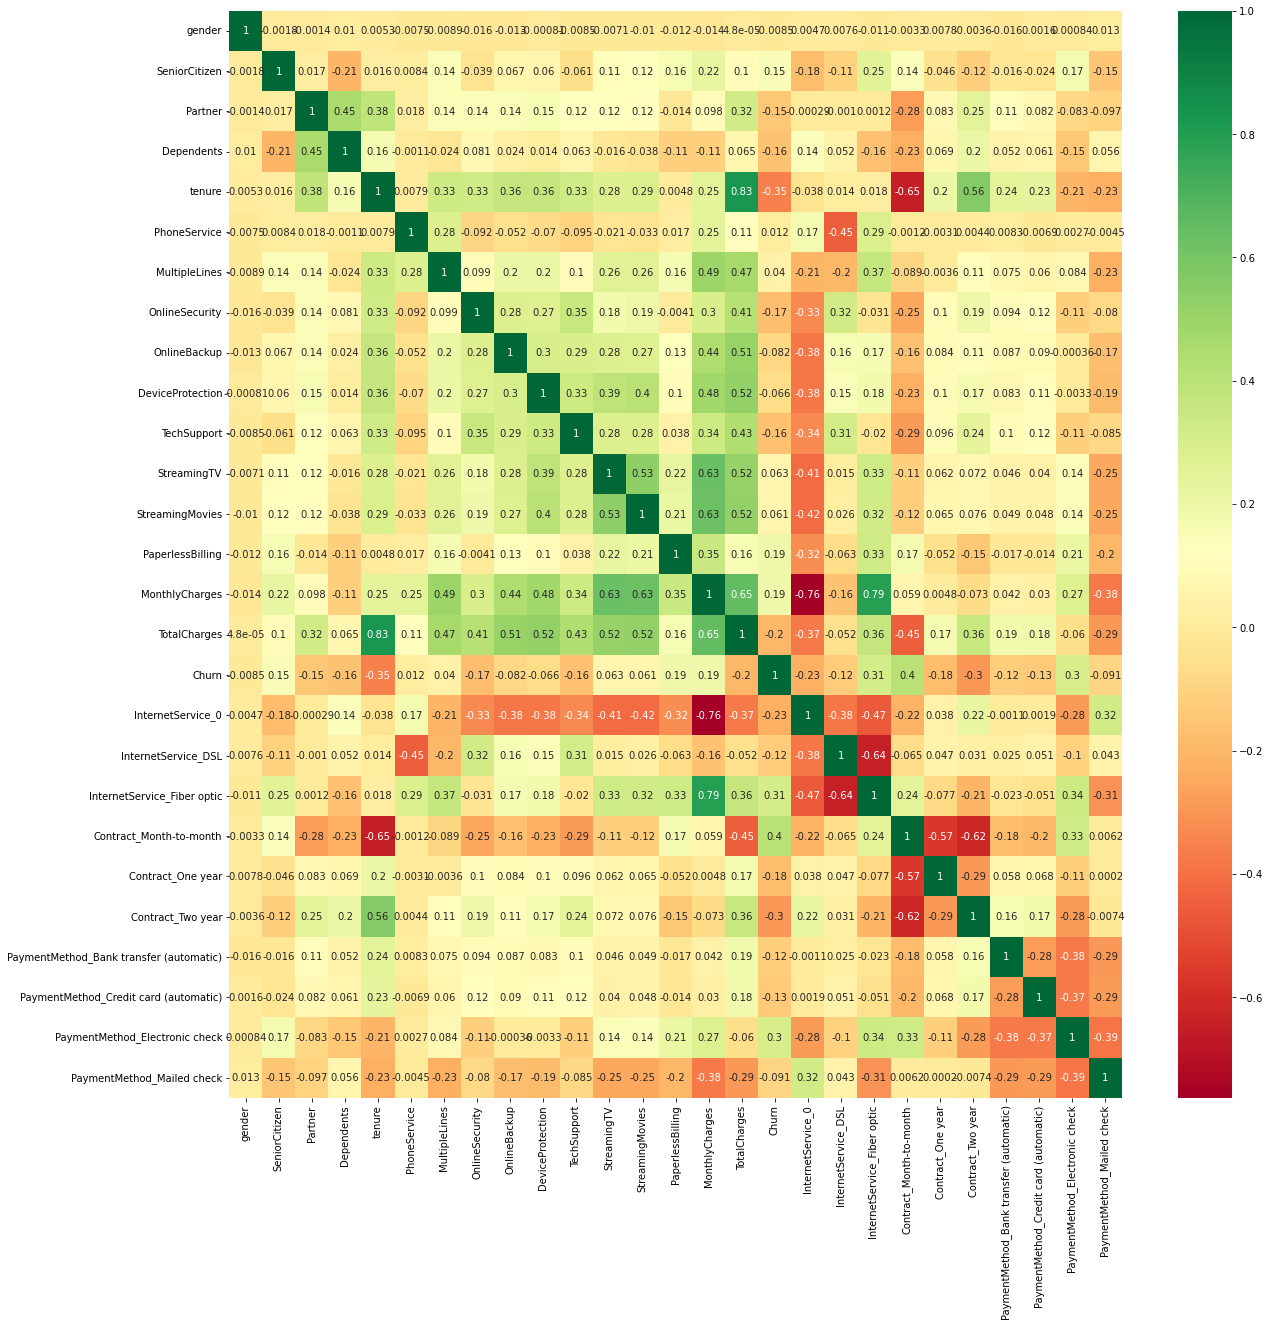

In [23]:
#get correlations of each features in dataset
import seaborn as sn

plt.figure(figsize=(20,20))
#plot heat map
sn.heatmap(df_processed.corr(),annot=True,cmap="RdYlGn")

## Univariate selection

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


X = df_processed.drop(labels='Churn', axis=1)
y = df_processed['Churn']    
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(30,'Score'))  #print 10 best features

                                      Specs       Score
19                  Contract_Month-to-month  516.714004
21                        Contract_Two year  486.223101
24           PaymentMethod_Electronic check  424.113152
18              InternetService_Fiber optic  372.082851
16                        InternetService_0  285.475152
4                                    tenure  238.007569
20                        Contract_One year  176.608724
7                            OnlineSecurity  147.165601
10                              TechSupport  135.439602
1                             SeniorCitizen  133.482766
3                                Dependents  131.271509
13                         PaperlessBilling  104.979224
23    PaymentMethod_Credit card (automatic)   99.972539
2                                   Partner   81.857769
22  PaymentMethod_Bank transfer (automatic)   76.619066
15                             TotalCharges   73.258486
17                      InternetService_DSL   71

## Drop features

Given the results above it is safe to drop the column that shows gender.

In [25]:
df_processed.drop(labels='gender', axis=1, inplace=True)

# Classify

## Prepare train and test sets

In [26]:
# Prepare data for X and y
X = df_processed.drop(labels='Churn', axis=1)
y = df_processed['Churn']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1, stratify=y)

In [28]:
print(X_train.shape)
print(X_test.shape)

(5625, 25)
(1407, 25)


## Check the stratify parameter

In [29]:
print(y_train[y_train==1].count())
print(y_train[y_train==0].count())
print(y_train[y_train==1].count()/y_train[y_train==0].count())

1495
4130
0.3619854721549637


In [30]:
print(y_test[y_test==1].count())
print(y_test[y_test==0].count())
print(y_test[y_test==1].count()/y_test[y_test==0].count())

374
1033
0.36205227492739595


## Create ANN

In [31]:
# find input shape
print(X.shape)
no_inputs_X = X.shape[1]
print(no_inputs_X)

(7032, 25)
25


In [32]:
model = keras.Sequential([
    keras.layers.Dense(20, activation='relu', input_shape=(no_inputs_X,)),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [33]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
176/176 [==============================] - 0s 663us/step - loss: 0.4907 - accuracy: 0.7657
Epoch 2/10
176/176 [==============================] - 0s 652us/step - loss: 0.4246 - accuracy: 0.7991
Epoch 3/10
176/176 [==============================] - 0s 651us/step - loss: 0.4168 - accuracy: 0.8036
Epoch 4/10
176/176 [==============================] - 0s 663us/step - loss: 0.4144 - accuracy: 0.8053
Epoch 5/10
176/176 [==============================] - 0s 652us/step - loss: 0.4120 - accuracy: 0.8071
Epoch 6/10
176/176 [==============================] - 0s 663us/step - loss: 0.4102 - accuracy: 0.8062
Epoch 7/10
176/176 [==============================] - 0s 629us/step - loss: 0.4088 - accuracy: 0.8060
Epoch 8/10
176/176 [==============================] - 0s 617us/step - loss: 0.4080 - accuracy: 0.8057
Epoch 9/10
176/176 [==============================] - 0s 629us/step - loss: 0.4064 - accuracy: 0.8068
Epoch 10/10
176/176 [==============================] - 0s 617us/step - loss: 0.405

## Evaluate model

In [34]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 535us/step - loss: 0.4448 - accuracy: 0.7960


In [35]:
y_pred = model.predict(X_test)
y_pred[:20]

44/44 [==============================] - 0s 442us/step


array([[0.23774762],
       [0.16395609],
       [0.00477853],
       [0.20994191],
       [0.66229784],
       [0.03596273],
       [0.7655607 ],
       [0.13539435],
       [0.30845934],
       [0.00724302],
       [0.30978304],
       [0.00329208],
       [0.5914797 ],
       [0.30823702],
       [0.6853319 ],
       [0.47540736],
       [0.6699506 ],
       [0.28849146],
       [0.0392018 ],
       [0.02348246]], dtype=float32)

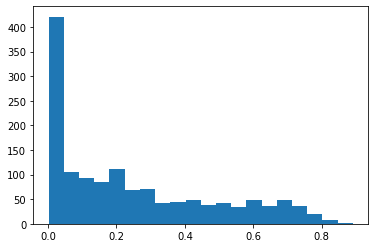

In [36]:
plt.hist(y_pred, bins=20);

From the histogram above threshold can be set to whatever value higher than 0.1, and it won't change results too much.

In [37]:
# IMPORTANT threshold is very important parameter, usually it is set to 0.5, however, other inputs are also viable
threshold = 0.5

y_pred_temporary = []
for i in y_pred:
    if i > threshold:
        y_pred_temporary.append(1)
    else:
        y_pred_temporary.append(0)
        
y_pred_temporary;

In [38]:
# count predicted classes
count_1 = 0
count_0 = 0
for i in y_pred_temporary:
    if i == 0:
        count_0 += 1
    elif i == 1:
        count_1 += 1

y_pred = y_pred_temporary
print(f'number of 1 : {count_1}, number of 0: {count_0}')

number of 1 : 269, number of 0: 1138


# Visualize classification

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.66      0.48      0.55       374

    accuracy                           0.80      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.80      0.78      1407



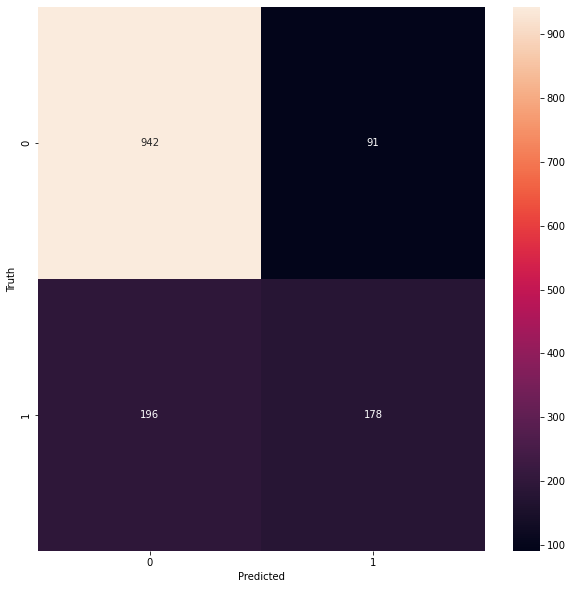

In [40]:
import seaborn as sn

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth');